In [49]:
import geopandas as gpd
import pandas as pd
import numpy as np
import leafmap
import leafmap
import geemap
import ee
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
filepath = 'D:\Trainings\gee\Pabbi_RevisedLandtype-V4.geojson'
gdf=gpd.read_file(filepath)
gdf.head()

,Area_Acre,Crop_Type,FFID,Landuse_Ma,Mouza_Name,Parcel_ID,agri_count,built_count,NDVI,NDBI,...,NDWI,B2,B3,B4,B8,B11,pct_built,pct_agri,landuse_class,geometry
0,0.101785,None,1,Agriculture,Khushmaqam,668,1.721569,4.980392,0.226656,-0.016614,...,-0.261929,1080.794583,1314.424346,1412.001354,2250.015724,2147.930654,0.743125,0.256875,Partial-Builtup,"POLYGON ((71.74996 34.03193, 71.75027 34.03195..."
1,0.315557,None,3,Agriculture,Khushmaqam,632,5.627451,15.454902,0.254974,0.013744,...,-0.298905,905.980655,1133.265953,1248.493593,2115.168267,2148.237869,0.733073,0.266927,Partial-Builtup,"POLYGON ((71.74868 34.03205, 71.74869 34.03195..."
2,0.187644,None,4,Agriculture,Khushmaqam,669,4.796078,9.149020,0.248897,-0.003842,...,-0.284861,989.403836,1234.108843,1331.561342,2231.942662,2198.647527,0.656074,0.343926,Partial-Builtup,"POLYGON ((71.75021 34.03218, 71.75022 34.0321,..."
3,0.161568,None,5,Agriculture,Khushmaqam,693,6.192157,1.698039,0.410130,-0.109844,...,-0.431634,806.999988,1099.118312,1177.751882,2761.666157,2193.297278,0.215209,0.784791,Pure-Agriculture,"POLYGON ((71.75401 34.03224, 71.75403 34.03219..."
4,0.229336,None,6,Agriculture,Khushmaqam,667,2.674510,11.192157,0.197473,-0.011919,...,-0.233127,1160.127481,1376.297936,1480.144814,2196.267099,2126.134001,0.807127,0.192873,Pure-Builtup,"POLYGON ((71.74971 34.03192, 71.74996 34.03193..."


In [57]:
# Lets Convert the gdf of the original file to ee features utilizing earth engine power
ee.Initialize()
ee.Authenticate()
boundary = geemap.gdf_to_ee(gdf)

In [58]:
gdf

,Area_Acre,Crop_Type,FFID,Landuse_Ma,Mouza_Name,Parcel_ID,agri_count,built_count,NDVI,NDBI,...,NDWI,B2,B3,B4,B8,B11,pct_built,pct_agri,landuse_class,geometry
0,0.101785,None,1,Agriculture,Khushmaqam,668,1.721569,4.980392,0.226656,-0.016614,...,-0.261929,1080.794583,1314.424346,1412.001354,2250.015724,2147.930654,0.743125,0.256875,Partial-Builtup,"POLYGON ((71.74996 34.03193, 71.75027 34.03195..."
1,0.315557,None,3,Agriculture,Khushmaqam,632,5.627451,15.454902,0.254974,0.013744,...,-0.298905,905.980655,1133.265953,1248.493593,2115.168267,2148.237869,0.733073,0.266927,Partial-Builtup,"POLYGON ((71.74868 34.03205, 71.74869 34.03195..."
2,0.187644,None,4,Agriculture,Khushmaqam,669,4.796078,9.149020,0.248897,-0.003842,...,-0.284861,989.403836,1234.108843,1331.561342,2231.942662,2198.647527,0.656074,0.343926,Partial-Builtup,"POLYGON ((71.75021 34.03218, 71.75022 34.0321,..."
3,0.161568,None,5,Agriculture,Khushmaqam,693,6.192157,1.698039,0.410130,-0.109844,...,-0.431634,806.999988,1099.118312,1177.751882,2761.666157,2193.297278,0.215209,0.784791,Pure-Agriculture,"POLYGON ((71.75401 34.03224, 71.75403 34.03219..."
4,0.229336,None,6,Agriculture,Khushmaqam,667,2.674510,11.192157,0.197473,-0.011919,...,-0.233127,1160.127481,1376.297936,1480.144814,2196.267099,2126.134001,0.807127,0.192873,Pure-Builtup,"POLYGON ((71.74971 34.03192, 71.74996 34.03193..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.171500,None,6723,Agriculture,Amankot,843,8.384314,0.000000,0.571489,-0.169860,...,-0.555056,460.745576,706.997455,669.423946,2584.963943,1786.159601,0.000000,1.000000,Pure-Agriculture,"POLYGON ((71.76623 34.0439, 71.76626 34.04366,..."
5755,0.466952,None,6724,Agriculture,Amankot,848,22.807843,0.000000,0.420987,-0.114228,...,-0.461200,606.152732,866.504644,990.755175,2359.760189,1915.876354,0.000000,1.000000,Pure-Agriculture,"POLYGON ((71.76681 34.0447, 71.76711 34.04347,..."
5756,-0.303899,None,6725,Agriculture,Amankot,1331,14.847059,0.000000,0.488737,-0.137628,...,-0.494530,601.428608,912.079541,938.331616,2769.259731,2078.009210,0.000000,1.000000,Pure-Agriculture,"POLYGON ((71.77762 34.02896, 71.77766 34.02877..."
5757,3.634200,None,6726,Agriculture,Amankot,2070,177.721569,27.772549,0.417301,-0.110437,...,-0.453149,676.936347,959.914195,1077.387722,2598.212482,2088.983032,0.135150,0.864850,Pure-Agriculture,"POLYGON ((71.79385 34.02814, 71.79411 34.02642..."


In [59]:
# Dropping the unnecessary columns
gdf.drop(columns =['agri_count','built_count','pct_built','pct_agri'], inplace=True)
gdf.columns

Index(['Area_Acre', 'Crop_Type', 'FFID', 'Landuse_Ma', 'Mouza_Name',
       'Parcel_ID', 'NDVI', 'NDBI', 'BUI', 'UI', 'NDWI', 'B2', 'B3', 'B4',
       'B8', 'B11', 'landuse_class', 'geometry'],
      dtype='object')

In [60]:
# Dropping the geometry column
gdf.drop(columns =['geometry'], inplace=True)
gdf.columns

Index(['Area_Acre', 'Crop_Type', 'FFID', 'Landuse_Ma', 'Mouza_Name',
       'Parcel_ID', 'NDVI', 'NDBI', 'BUI', 'UI', 'NDWI', 'B2', 'B3', 'B4',
       'B8', 'B11', 'landuse_class'],
      dtype='object')

In [61]:
# Checking for Null values.
print("Null values in the dataset: ", gdf.isnull().sum())
gdf.dropna(inplace=True)
print(gdf['landuse_class'].value_counts())

Null values in the dataset:  Area_Acre           0
Crop_Type        5425
FFID                0
Landuse_Ma          0
Mouza_Name          0
Parcel_ID           0
NDVI                0
NDBI                0
BUI                 0
UI                  0
NDWI                0
B2                  0
B3                  0
B4                  0
B8                  0
B11                 0
landuse_class       0
dtype: int64
landuse_class
Pure-Agriculture       243
Partial-Agriculture     62
Partial-Builtup         22
Mixed                    5
Pure-Builtup             2
Name: count, dtype: int64


In [62]:
# Lets Encode teh target labels into numbers
labels_encoder = LabelEncoder()
gdf['landuse_class_encoded'] = labels_encoder.fit_transform(gdf['landuse_class'])

gdf['landuse_class_encoded'].value_counts()

landuse_class_encoded
3    243
1     62
2     22
0      5
4      2
Name: count, dtype: int64

In [63]:
# Lets seperte the featues and target

X = gdf[['B2','B3','B4','B8','B11', 'NDVI','NDBI', 'BUI', 'UI', 'NDWI']]
y = gdf['landuse_class_encoded']

#save class labels for later decoding
class_names = labels_encoder.classes_

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#initialize and train the model
rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced' ,max_depth=10, min_samples_split=2, 
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [85]:
#Make the predictions
y_pred = rf_model.predict(X_test)


In [86]:
# Evaluate the Performance of the model

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                      precision    recall  f1-score   support

              Mixed       0.50      1.00      0.67         1
Partial-Agriculture       0.88      0.79      0.83        19
    Partial-Builtup       0.83      0.71      0.77         7
   Pure-Agriculture       0.95      0.99      0.97        73
       Pure-Builtup       0.00      0.00      0.00         1

           accuracy                           0.92       101
          macro avg       0.63      0.70      0.65       101
       weighted avg       0.91      0.92      0.92       101

Confusion Matrix:
 [[ 1  0  0  0  0]
 [ 0 15  0  4  0]
 [ 1  1  5  0  0]
 [ 0  1  0 72  0]
 [ 0  0  1  0  0]]


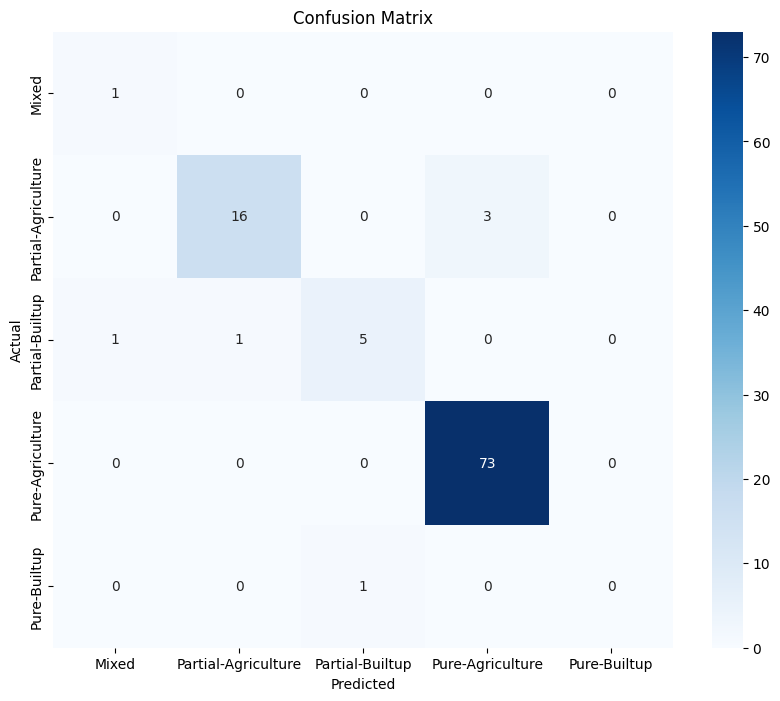

In [67]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
# Lets save the model for future use
import joblib
joblib.dump(rf_model, 'Landcover_randomforest_model.pkl')   


['Landcover_randomforest_model.pkl']

# Now we will be using this model for prediction on the whole dataset

# Predict Per Pixel (raster-based classification) 
## Steps
1. Prepare dataset
2. Generate a feature Stack Raster
3. Train the Random Forest
4. Apply the Model to the Entire Raster
5. Visualize and Validate

In [ ]:
#1 Prepare the dataset 
# Make sure that the dataset has requisite bands information.

In [38]:
# Define a function to get imagery an apply filter
def get_collection (start_date,end_date):
    collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    filtered_collection = collection.filterDate(start_date, end_date).filterBounds(boundary.geometry()).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
    return filtered_collection

In [39]:
# defing ndvi , NDBI , BUI and UI indices
def get_indices(image):
    ndwi = image.normalizedDifference(['B8', 'B11']).rename('NDWI')
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    ndbi = image.normalizedDifference(['B11', 'B8']).rename('NDBI')
    bui = (
        image.select('B11').add(image.select('B4'))
        .subtract(image.select('B8'))
        .subtract(image.select('B2'))
        .divide(
            image.select('B11')
            .add(image.select('B4'))
            .add(image.select('B8'))
            .add(image.select('B2'))
        )
        .rename('BUI')
    )
    ui = image.expression(
        '(NDVI - NDBI) / (NDVI + NDBI)', {
            'NDBI': ndbi,
            'NDVI': ndvi
        }).rename('UI')
    
  
    return image.addBands(ndvi).addBands(ndbi).addBands(bui).addBands(ui).addBands(ndwi)


In [40]:
def get_composite(filtered_collection):

    # Selecting requisite bands
    selected_bands = ['B2', 'B3', 'B4', 'B8', 'B11']
    filtered_collection = filtered_collection.select(selected_bands)
    # Add the indices to the image collection   
    # Add all indices to each image in the colleciton
    indexed_collection = filtered_collection.map(get_indices)   

    #Reduce the entire colleciton to a mean composite image
    composite_img = indexed_collection.mean()

    #Clip to the boundary of pabbi
    composite_img = composite_img.clip(boundary.geometry())


    return composite_img


In [41]:
filtered_collection = get_collection('2022-01-01', '2024-12-31')
composite_img = get_composite(filtered_collection)

In [42]:
# Show the band names of the composite image
def show_band_names(composite_img):
    band_names = composite_img.bandNames().getInfo()
    print("Band names in the composite image:")
    for name in band_names:
        print(name)
show_band_names(composite_img)


Band names in the composite image:
B2
B3
B4
B8
B11
NDVI
NDBI
BUI
UI
NDWI


In [22]:


# 1. Define output filename
out_tif = 'sentinel2_features_indices.tif'

# 2. Export
geemap.ee_export_image(
    composite_img,
    filename=out_tif,
    scale=10,                                   # Sentinel-2 resolution
    region=boundary.geometry(),                 # your AOI
    file_per_band=False,                        # one multiband file
    crs='EPSG:4326'                             # or your preferred CRS
)

print(f"Exported multiband GeoTIFF: {out_tif}")


Generating URL ...
Please wait ...
Data downloaded to d:\Trainings\gee\sentinel2_features_indices.tif
Exported multiband GeoTIFF: sentinel2_features_indices.tif


import rasterio
import numpy as np
import joblib

# Load the trained Random Forest pipeline
pipeline = joblib.load('crop_rf_pipeline.pkl')
rf_model = pipeline['model']
feature_cols = pipeline['feature_cols']  # ['B2','B3','B4','B8','B11','NDVI','NDBI','BUI','UI','NDWI']

# Open the multiband GeoTIFF
with rasterio.open('sentinel2_features_indices.tif') as src:
    profile = src.profile.copy()
    data = src.read()  # shape: (bands, height, width)
    # Check that data.shape[0] matches len(feature_cols)
    assert data.shape[0] == len(feature_cols), "Band count mismatch with feature columns."

# Prepare feature array for prediction
# Stack and reshape: (bands, h, w) -> (h*w, bands)
bands, height, width = data.shape
X = np.transpose(data, (1, 2, 0)).reshape(-1, bands)  # shape: (height*width, bands)

# Predict land cover classes
y_pred = rf_model.predict(X)

# Reshape predictions back to 2D raster
classified = y_pred.reshape(height, width).astype(profile['dtype'])

# Update profile for single-band output
profile.update(
    count=1,
    dtype=classified.dtype,
    compress='lzw'
)

# Save classified land cover map
with rasterio.open('classified_map.tif', 'w', **profile) as dst:
    dst.write(classified, 1)

# Display a snippet of the classified map array
classified_snippet = classified[:5, :5]
classified_snippet


In [77]:
# Hyper Parameter Tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1) Define the parameter search space
param_dist = {
    'n_estimators':       [100, 200, 300, 400, 500],
    'max_depth':          [None, 10, 15, 20, 25],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf':   [1, 2, 4, 6],
    'class_weight':       ['balanced', 'balanced_subsample']
}

# 2) Set up the RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,              # number of combinations to try
    scoring='f1_weighted',  # optimize for weighted F1
    cv=5,                   # 5‑fold cross‑validation
    n_jobs=-1,              # use all cores
    random_state=42,
    verbose=1
)

# 3) Run the search on your training data
rs.fit(X_train, y_train)

# 4) Inspect the best parameters
print("Best hyperparameters found:")
for k, v in rs.best_params_.items():
    print(f"  {k}: {v}")

# 5) Evaluate the best estimator on the test set
best_rf = rs.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nClassification Report (best estimator):")
print(classification_report(y_test, y_pred, zero_division=0))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters found:
  n_estimators: 300
  min_samples_split: 2
  min_samples_leaf: 2
  max_depth: 10
  class_weight: balanced

Classification Report (best estimator):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.80      0.84      0.82        19
           2       0.71      0.71      0.71         7
           3       0.97      0.96      0.97        73
           4       0.00      0.00      0.00         1

    accuracy                           0.91       101
   macro avg       0.60      0.70      0.63       101
weighted avg       0.91      0.91      0.91       101

